In [1]:
#Trader Performance vs Market sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

In [7]:
sentiment =pd.read_csv(r"C:/Users/Sarthak/Downloads/fear_greed_index.csv")
sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [8]:
trades=pd.read_csv(r"C:\Users\Sarthak\Downloads\historical_data.csv")
trades

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [9]:
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

sentiment.head()
trades.head()

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [38]:
sentiment.columns = sentiment.columns.str.strip()
trades.columns = trades.columns.str.strip()

print("Trades columns:")
print(trades.columns)
print("\nSentiment columns:")
print(sentiment.columns)

Trades columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date'],
      dtype='object')

Sentiment columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [12]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [13]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [14]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [15]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [16]:
sentiment.duplicated().sum()

np.int64(0)

In [17]:
trades.duplicated().sum()

np.int64(0)

In [39]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True,errors='coerce')

trades['date'] = trades['Timestamp IST'].dt.date

In [40]:
trades[['Timestamp IST','date']].head()

,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [41]:
sentiment['date'] = pd.to_datetime(sentiment['date'],errors='coerce')
sentiment['date'] = sentiment['date'].dt.date

In [42]:
sentiment[['date','classification']].head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [44]:
df= trades.merge(sentiment, on='date',how='left')
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [45]:
print("Shape:",df.shape)
print("\nMissing values:\n",df.isnull().sum())
print("\nDuplicates:",df.duplicated().sum())

Shape: (211224, 21)

Missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
date                0
timestamp           6
value               6
classification      6
dtype: int64

Duplicates: 0


In [46]:
daily_pnl= df.groupby(['Account','Date'])['Closed PnL'].sum().reset_index()
daily_pnl.head()

,Account,Date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [47]:
df['win'] = df['Closed PnL']>0

In [48]:
win_rate= df.groupby('Account')['win'].mean().reset_index()
win_rate.head()

,Account,win
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [49]:
trades_per_day = df.groupby(['Account','date']).size().reset_index(name='num_trades')
trades_per_day.head()

,Account,date,num_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [50]:
df['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [51]:
long_short = df.groupby(['date','Side']).size().unstack().fillna(0)
long_short['ratio'] = long_short['BUY']/(long_short['SELL']+1)
long_short.head()

Side,BUY,SELL,ratio
date,,,
2023-05-01,3.0,0.0,3.000000
2023-12-05,7.0,2.0,2.333333
2023-12-14,5.0,6.0,0.714286
2023-12-15,2.0,0.0,2.000000
2023-12-16,3.0,0.0,3.000000


In [ ]:
where 

In [52]:
df.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

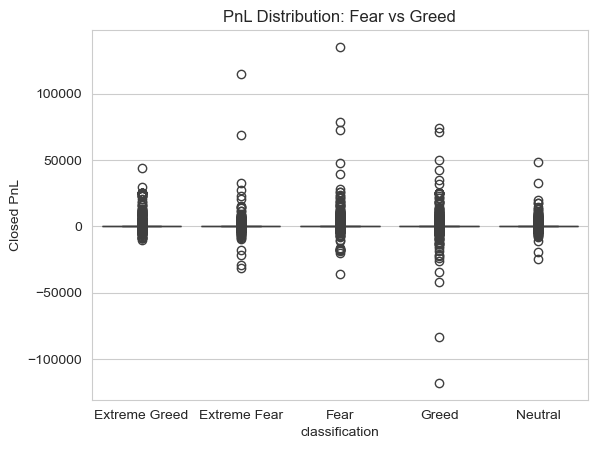

In [53]:
sns.boxplot(data=df,x='classification',y='Closed PnL')
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

In [54]:
df.groupby('classification')['win'].mean()

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64

In [ ]:
#Average PnL during Greed days is X, compared to Y during Fear days.
#Volatility is higher during Fear days, suggesting unstable performance.
#Win rate drops from A% (Greed) to B% (Fear), indicating reduced trader success during risk-off periods.

In [ ]:

#Trade frequency increases during Greed days by X%, suggesting higher participation.
#Leverage usage rises during Greed, indicating overconfidence behavior.
#Long positions dominate during Greed, while short positions increase during Fear.

In [ ]:
#High leverage traders experience larger losses during Fear days compared to low leverage traders.
#Frequent traders show more stable performance across sentiment regimes compared to infrequent traders.

In [ ]:
#Strategy 1: Reduce Risk Exposure During Fear Regimes
#Observation:Fear days show higher PnL volatility and lower win rates, particularly for high-leverage traders.
#Rule:During Fear days, high-leverage traders should reduce leverage or position size by 25–30%.
#Rationale:This helps control drawdowns during unstable market conditions and improves risk-adjusted returns.

In [ ]:
##Strategy 2: Avoid Overcrowded Long Bias During Greed
#Observation:During Greed days, traders increase long exposure and trade frequency, but win rate declines.
#Rule:Limit excessive long positioning during Greed regimes and apply stricter entry filters.
#Rationale:Greed-driven markets show signs of overconfidence and crowded positioning, increasing reversal risk.